In [1]:
import pandas as pd
import numpy as np
import h5py
import os
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch import nn, optim
from collections import OrderedDict

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
ancho = 160
alto = 129
canales = 3
pixeles = ancho*alto*canales
cantidadClases = 5
clases = ['Banano', 'Granada', 'Kiwi', 'Mango', 'Pitaya']
batchSize = 64

In [3]:
def view_classify(img, ps):
  ps = ps.data.numpy().squeeze()
  fig, (ax1, ax2) = plt.subplots(figsize=(16,13), ncols=2)
  ax1.imshow(img.numpy().transpose((1, 2, 0)))
  ax1.axis('off')
  ax2.barh(np.arange(cantidadClases), ps)
  ax2.set_aspect(0.1)
  ax2.set_yticks(np.arange(cantidadClases))
  ax2.set_yticklabels(clases, size='medium');
  ax2.set_title('Probabilidad de las Clases')
  ax2.set_xlim(0, 1.1)

  plt.tight_layout()

In [7]:
transform = transforms.Compose([transforms.Resize((ancho, alto)),transforms.ToTensor(),])
current_dir = os.getcwd()
dataset_path = os.path.join(current_dir, 'dataset', 'Frutas', 'Train')
trainset = ImageFolder(root=dataset_path, transform=transform)
trainloader = DataLoader(trainset, batch_size=batchSize, shuffle=True)

testset_path = os.path.join(current_dir, 'dataset', 'Frutas', 'Test')
testset = ImageFolder(root=testset_path, transform=transform)
testloader = DataLoader(testset, batch_size=batchSize, shuffle=True)

In [4]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(pixeles, 20640)
    self.fc2 = nn.Linear(20640, 6880)
    self.fc3 = nn.Linear(6880, 2293)
    self.fc4 = nn.Linear(2293, 764)
    self.fc5 = nn.Linear(764, 254)
    self.fc6 = nn.Linear(254, 84)
    self.fc7 = nn.Linear(84, cantidadClases)
      
  def forward(self, x):
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = F.relu(self.fc5(x))
    x = F.relu(self.fc6(x))
    x = F.log_softmax(self.fc7(x), dim=1)
    
    return x

In [ ]:
model = Network()
model.load_state_dict(torch.load('modelo_entrenado2.pth'))
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

C:\Users\Univalle\AppData\Local\Temp\ipykernel_16144\458900083.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('modelo_entrenado.pth'))


In [ ]:
epochs = 50
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    images = images.view(images.shape[0], -1)
    log_ps = model(images)
    loss = criterion(log_ps, labels)
     
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
  else:
    print(f"Epoch {150+e+1}, Training loss: {running_loss/len(trainloader)}")

Epoch 101, Training loss: 1.6065457261214822
Epoch 102, Training loss: 1.6065955141843375
Epoch 103, Training loss: 1.6064083394357713
Epoch 104, Training loss: 1.6064209372310314
Epoch 105, Training loss: 1.606374600176084
Epoch 106, Training loss: 1.6064305760092654
Epoch 107, Training loss: 1.606356834961196
Epoch 108, Training loss: 1.6063355096315934
Epoch 109, Training loss: 1.6063465809417983
Epoch 110, Training loss: 1.606150606931266
Epoch 111, Training loss: 1.6062356284109212
Epoch 112, Training loss: 1.6062050653716264
Epoch 113, Training loss: 1.6062119764796758
Epoch 114, Training loss: 1.606084919581979
Epoch 115, Training loss: 1.6060675756405975
Epoch 116, Training loss: 1.6061022180621907
Epoch 117, Training loss: 1.6060279264288433
Epoch 118, Training loss: 1.60592903727192
Epoch 119, Training loss: 1.6059363130795754
Epoch 120, Training loss: 1.6058853430263067
Epoch 121, Training loss: 1.6058637227042247
Epoch 122, Training loss: 1.6058582703946
Epoch 123, Training

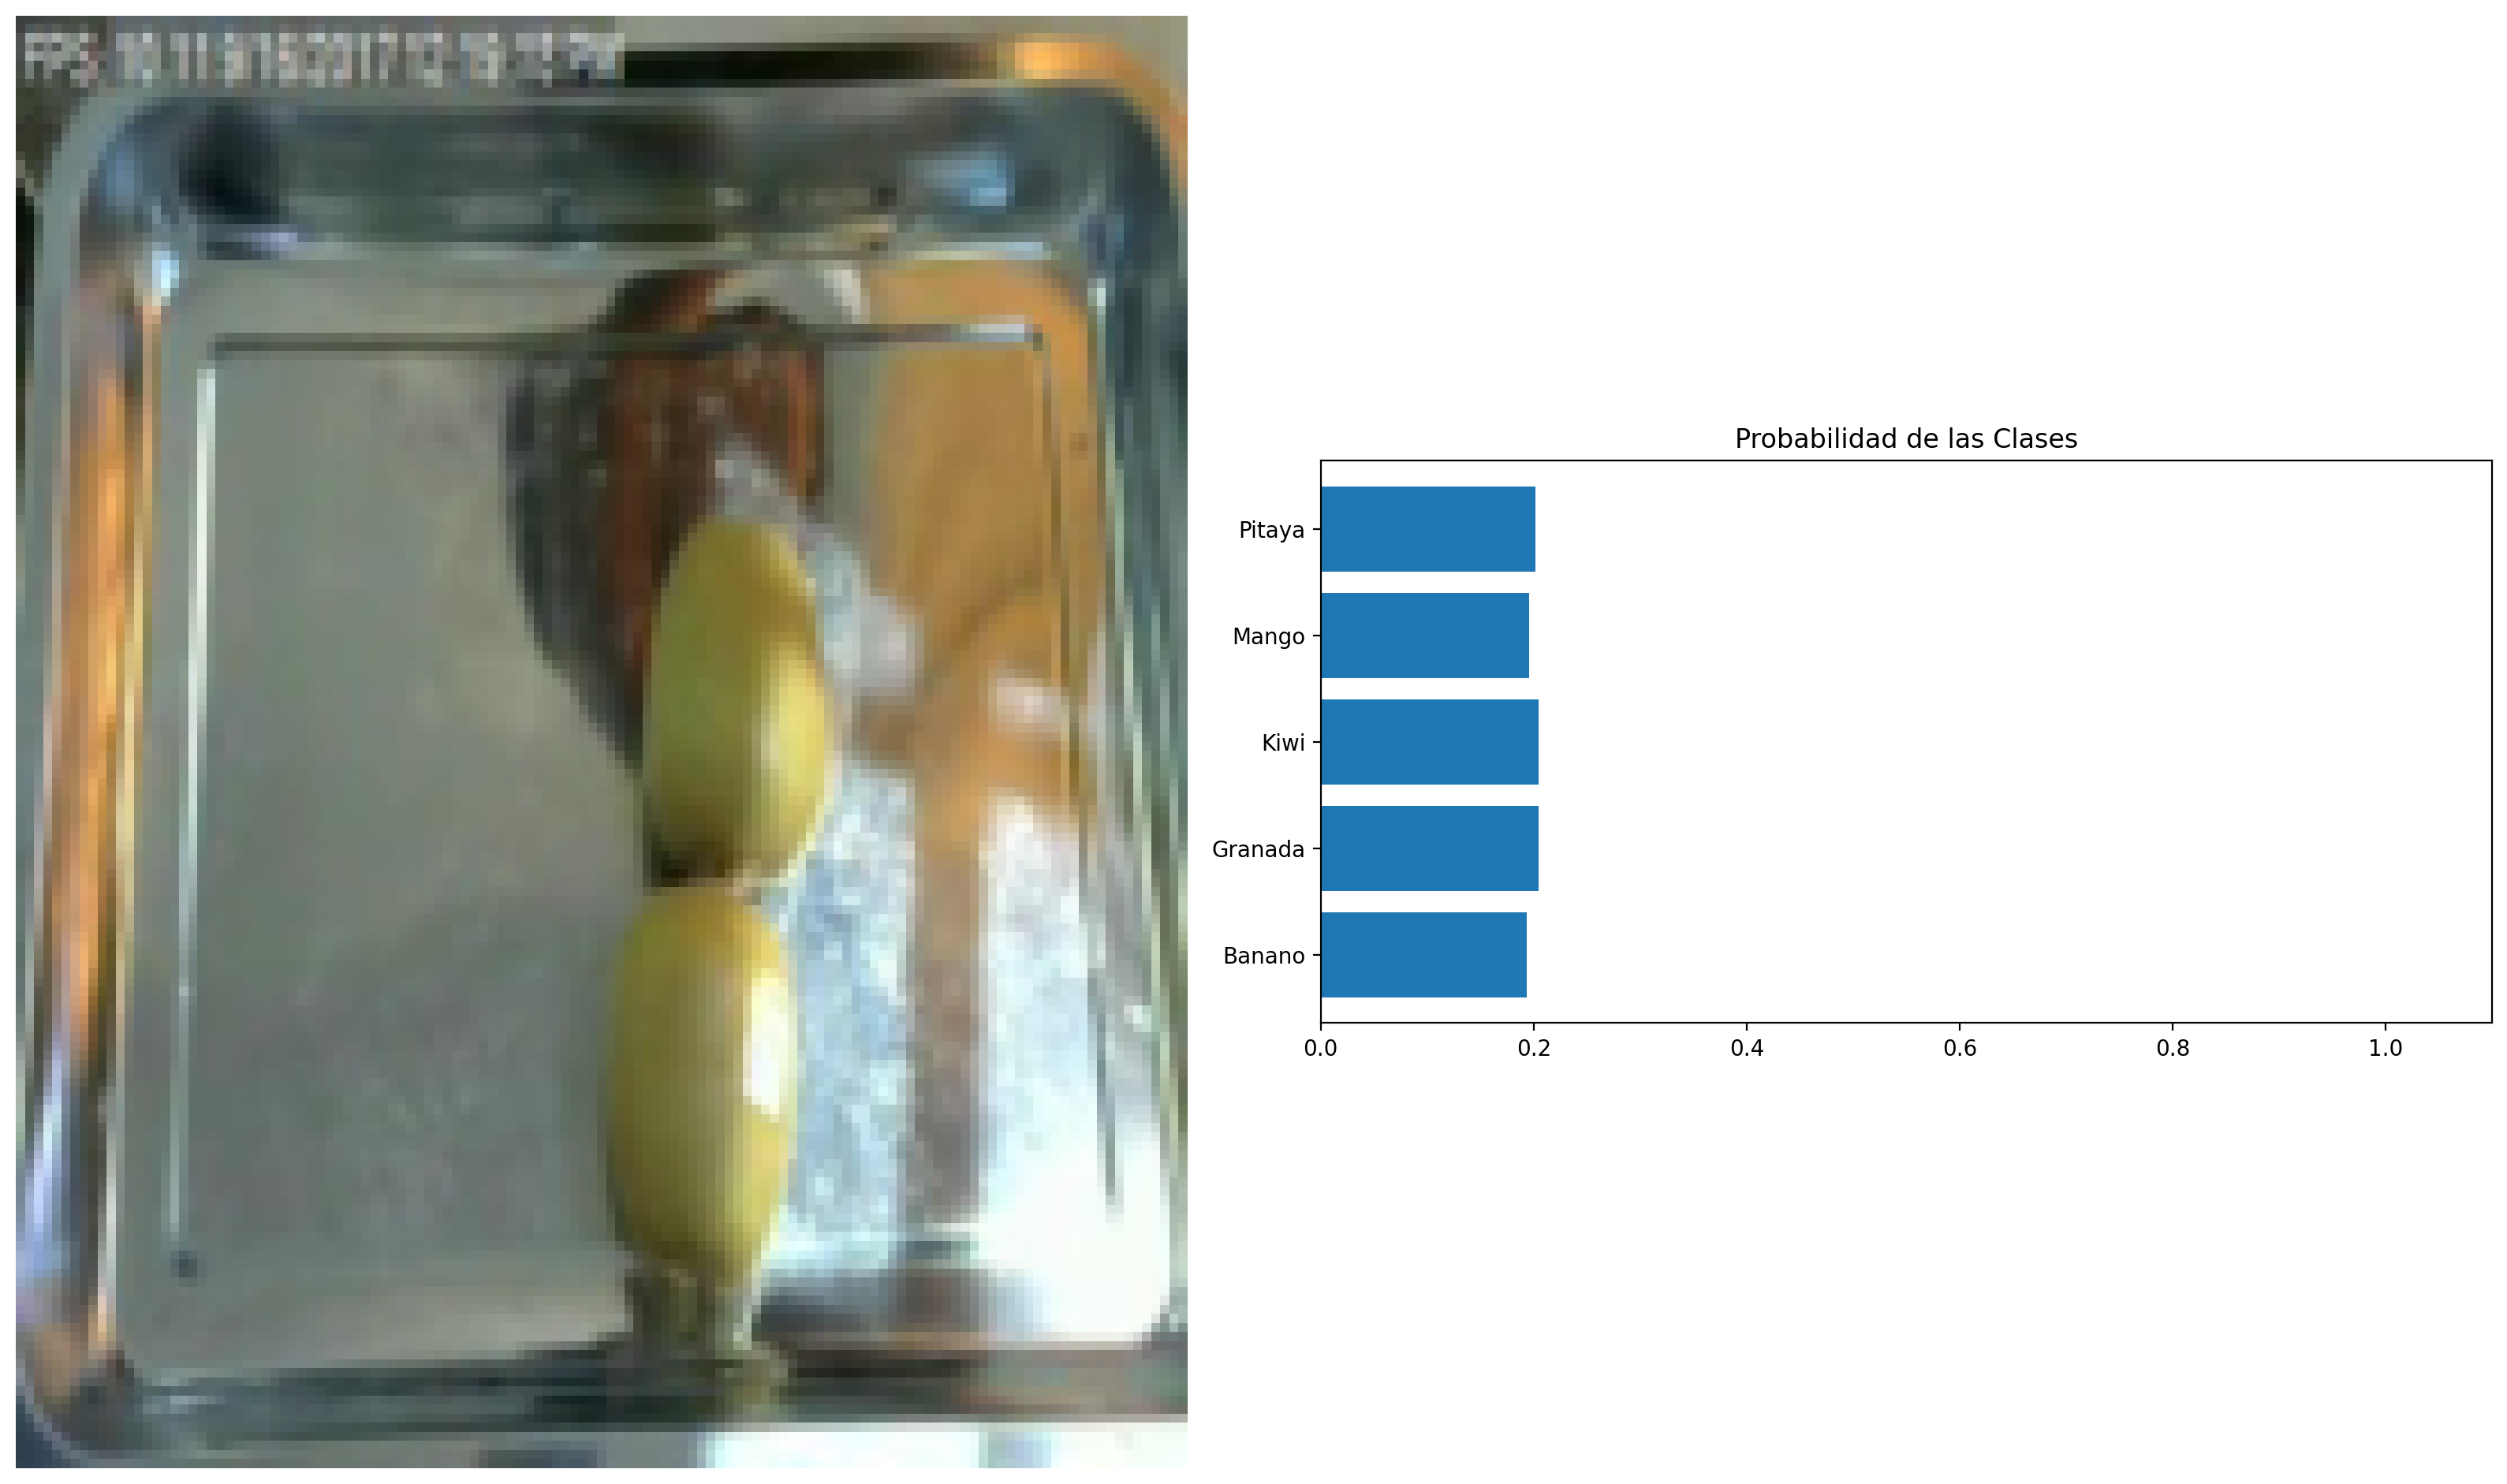

In [9]:
dataiter = iter(testloader)
images, labels = next(iter(testloader))
img = images[0].view(1, pixeles)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
view_classify(img.view(canales, ancho, alto), ps)

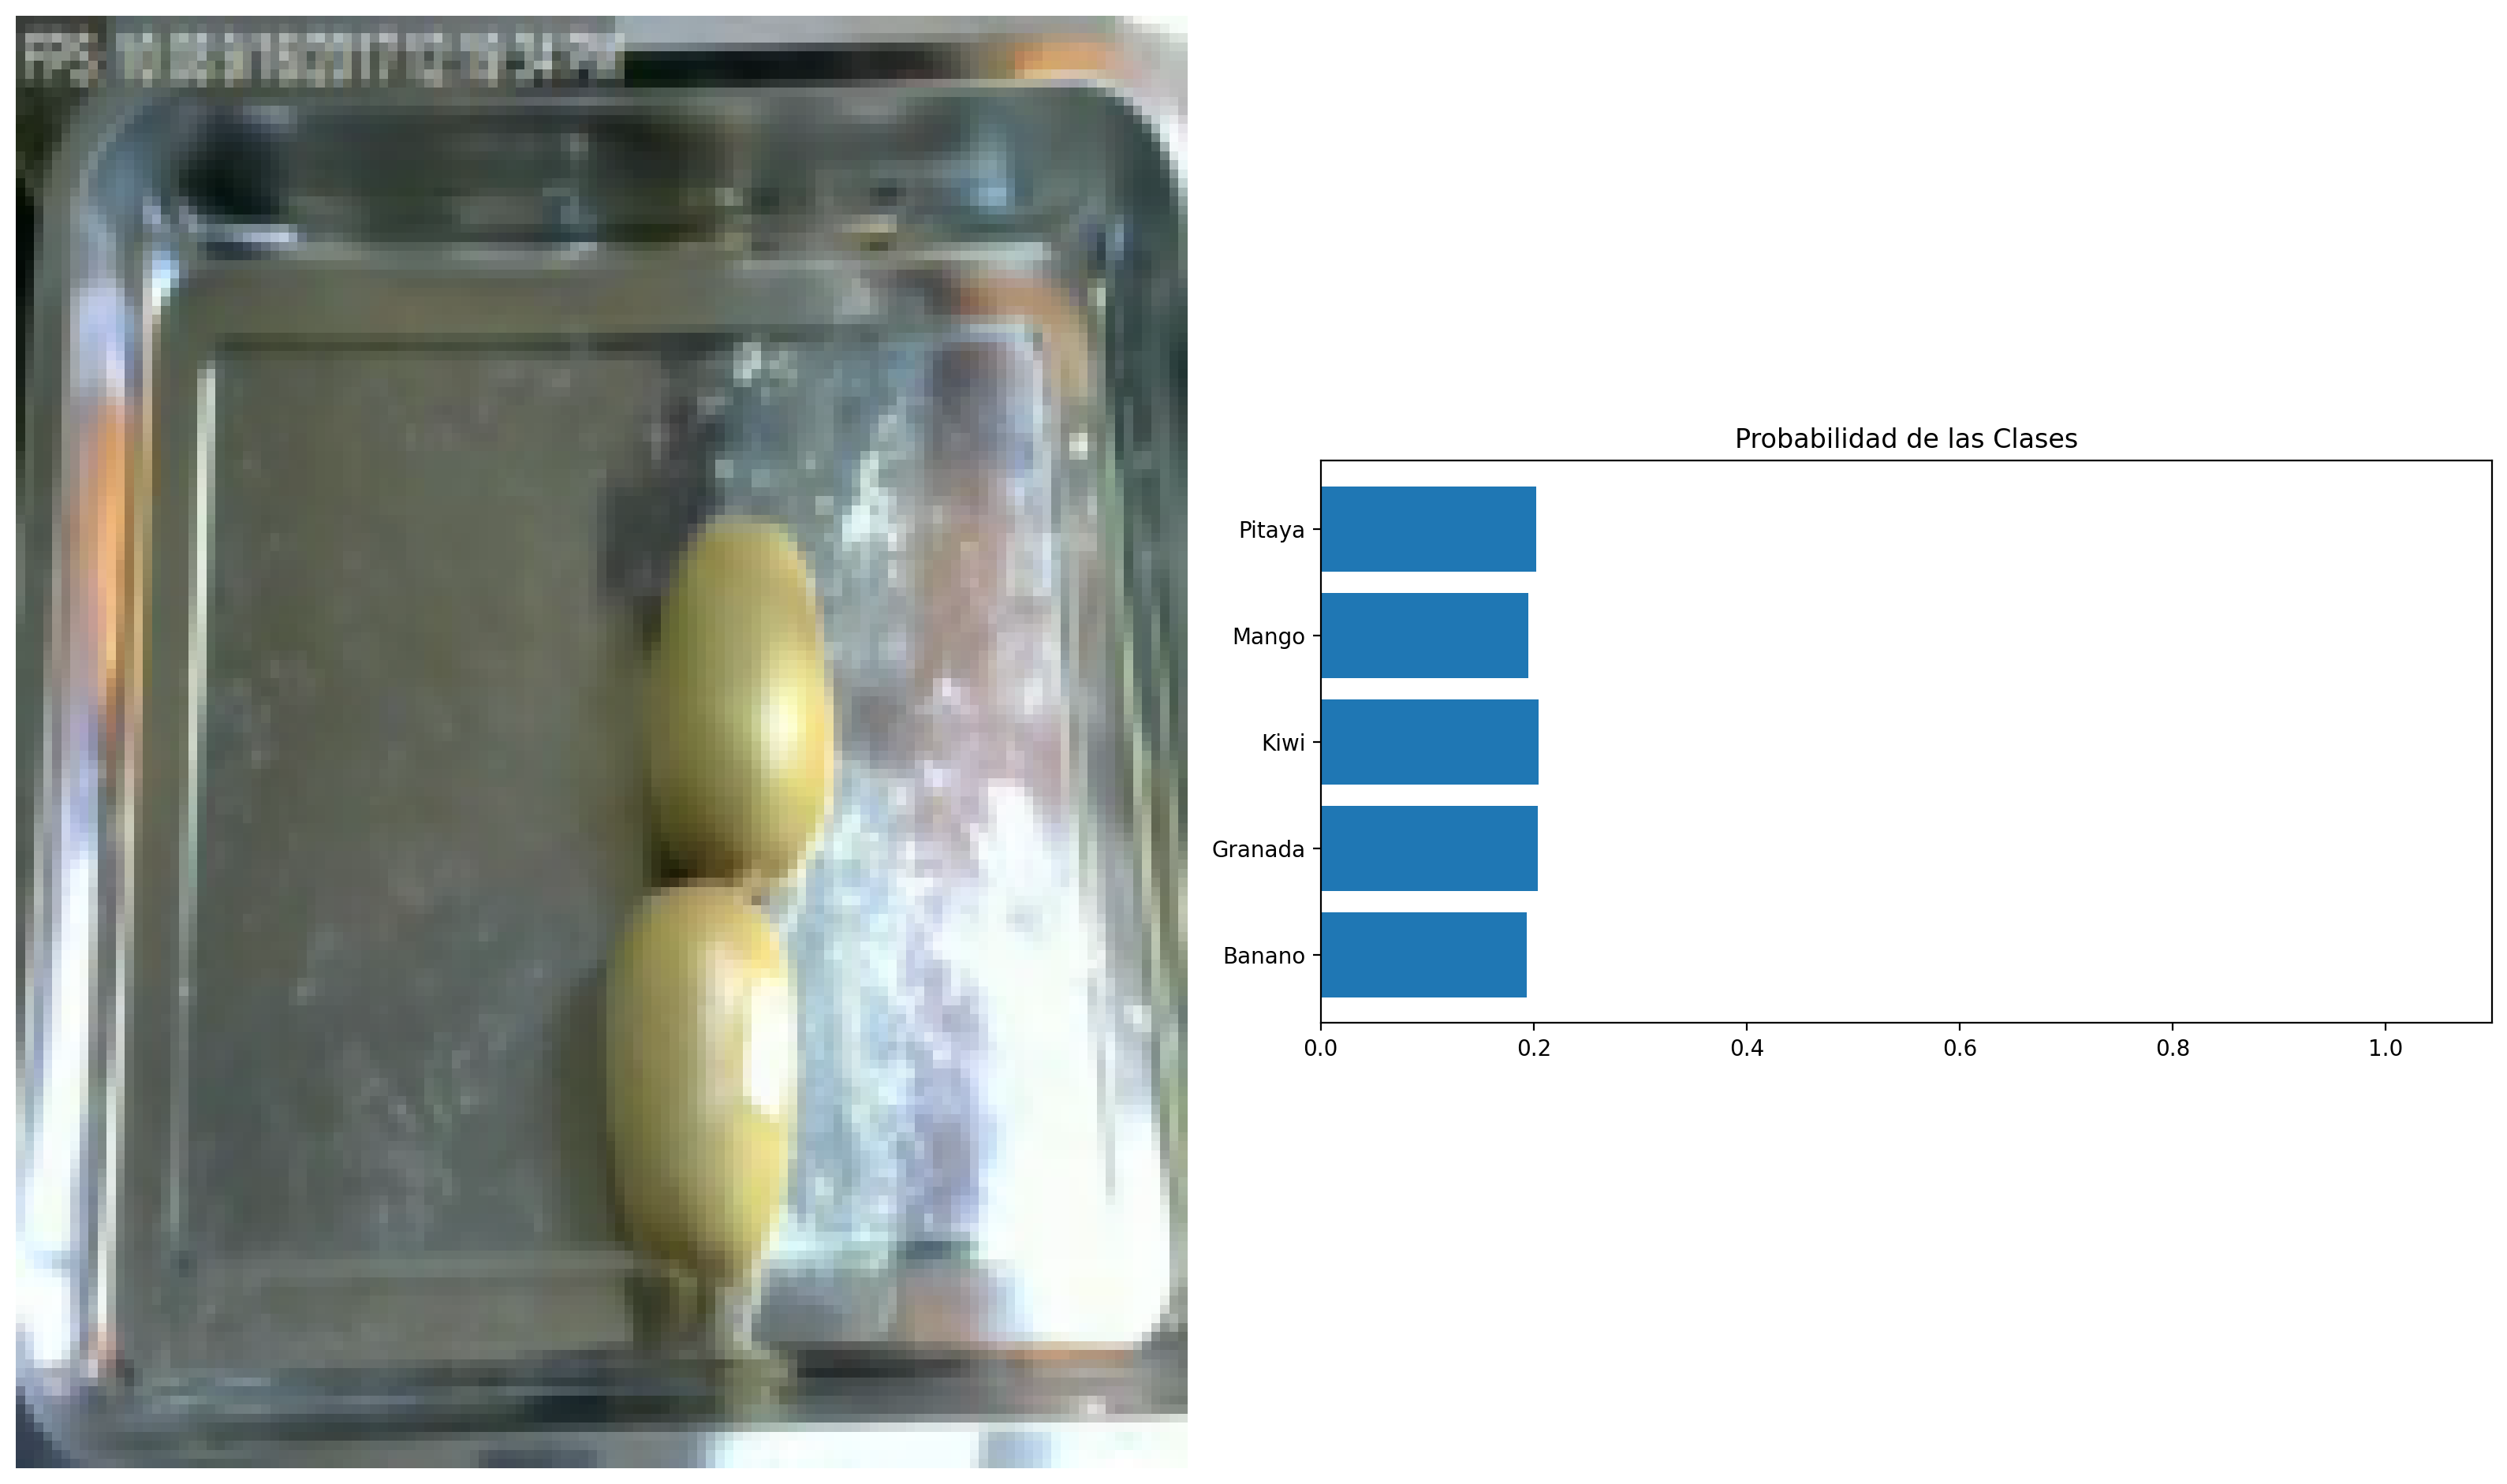

In [10]:
img = images[2].view(1, pixeles)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
view_classify(img.view(canales, ancho, alto), ps)

In [ ]:
torch.save(model.state_dict(), 'modelo_entrenado3.pth')
print("Modelo guardado exitosamente.")

Modelo guardado exitosamente.
